**Predicting The Diagnosis Of Diabetes In Patients Based On Their Glucose And Insulin Levels**

*Introduction*

This project will analyze a dataset concerning diabetes and attempt to diagnose the disease in individuals by comparing their glucose and insulin levels to the individuals included in the dataset. Upon digesting food, the body breaks down the food into its base components, such as sugar. This sugar will enter the blood and affect the blood glucose levels. Healthy individuals will produce insulin in response to this increase in blood sugar, whereas those with diabetes are unable to naturally regulate the glucose levels and may have little to no production of insulin by the pancreas. 

There are 2 types of diabetes: Type 1 is an autoimmune disease where the pancreas cannot produce its own insulin, Type 2 is more common and relates to higher production levels of insulin. When affected by this illness, the insulin production is very low or improperly used by the body and leads to abnormal levels of blood sugar. 
The question we will be answering in our project is: **Are we able to predict diabetes in an individual, solely based on their glucose and insulin levels?**

The dataset chosen was originally from the National Institute of Diabetes and Digestive and Kidney Diseases, then derived from Kaggle (https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset). It displays different variables that play a role in or indicate whether or not an individual is diabetic. In the raw dataset, there are nine columns, all containing numerical values, most of them integers. It is important to note the only dependent variable, the  ‘outcome’ column, which expresses the result of the prediction through the legend: 1 = yes, the individual is diabetic and 0 = no, the individual is not diabetic. One limitation of the study is the limited diversity in sampling, as the subjects are all females over 21 years old of Pima Indian heritage.


In [2]:
library(repr)
library(tidyverse)
library(tidymodels)
library(ggplot2)
options(repr.matrix.max.rows = 6)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

*Methods and Results*

In order to determine the diagnosis of diabetes in new patients, we will compare their glucose and insulin values to individuals with a known diagnosis. As previously mentioned, diabetes is associated with little to no insulin, regardless of increased blood glucose levels. Therefore, these two data columns will be selected, as well as the individual's outcome, which details whether or not they have diabetes. Also, we will filter the individuals in the dataset who are non-diabetic, but have a insulin level of zero. The cause of this is unknown since resting insulin levels should never be below zero in healthy individuals. 

The two new individuals used in our prediction will include one that is diabetic and one that is not based on literature-supported glucose and insulin levels. Normal insulin and glucose levels when fasting would be respectively < 17 mIU/L and around 70-100 mg/dL, while for diabetic individuals it is around 7mml/L and 140mg/dL. 

The first step in performing our data analysis is to upload the necessary libraries and read the data into R. Then, to clean, wrangle and filter the data to select the columns of interest: glucose, outcome and insulin. Then, the outcome is mutated to a factor since we are performing a classification and the data is split into training and testing sets. Tables are then made to display the total number of cases in our training set, the average insulin and glucose levels for diabetic and non-diabetic individuals. The last step of the preliminary data analysis is to visualize the training set as a scatter plot to view the relationship between insulin and glucose levels for non-diabetic and diabetic individuals. 

We will scale the data in order to accurately compare the two values, and train our classifier with the training set. We will then perform a classification analysis with the testing set to determine whether or not the two new individuals present a potential for being diabetic based on their glucose and insulin levels.  The data will be visualized as a scatter plot in order to clearly visualize a trend between glucose and insulin levels. The points will be coloured based on the individual’s outcome from the dataset. The two new individuals will be plotted against the known individuals from the dataset. The analysis will compare their values with the neighbors in order to predict the diagnosis. 

In order to find the optimal K value for our model, we need to create a new workflow to be used during cross validation. The new workflow will determine the accuracy of the K values that it tests, and after plotting the accuracy out, we will be able to pick a K value that is both accurate and stable. 
We can compute the two predictor variables (glucose and insulin), to classify an observation as diabetic or non-diabetic, using the optimal K-value for the k-nearest neighbor classification algorithm. We create a workflow that strings together all steps, then test the model by testing the diabetes_test data in order to determine the accuracy of the predictions based on our training data, represented in the confidence matrix. Finally, we create a plot containing  the testing data to visualize the accuracy of our estimates based on the k-nearest neighbor algorithm based on our data set. We graph the diabetes_prediction to show a visualization, color coding the two outcomes for emphasis. 

We will then proceed to create a tibble with the 2 new observations we have decided to create to test against the classifier. Through the use of the predict() function we will be able to determine whether the individuals would be diabetic or non-diabetic and see if the results are what we had expected from the classifier. We then will input the observations in a tibble with the testing data to facilitate the visualization of the data. 

Having already the visualized the testing data, we will proceed to visualize the new observations alone and then include them in the graph with the testing data to see the classifier in its entirety. The visualization will be a scatterplot and the data will be colored based on the legend “ Is the individual diabetic?”. Blue data are diabetic individuals while red data are non-diabetic individuals. Glucose levels will lie on the y axis while insulin levels on the x axis to detemrine whether there is in fact correlation between the two. Finally, the 2 new observations will be circled in the graph so we will be able to easily locate them amongst the testing data.



In [3]:
# Preliminary Exploratory Data Analysis: Read Data into R
diabetes_data <- read.csv("diabetes.csv")
diabetes_data

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
5,121,72,23,112,26.2,0.245,30,0
1,126,60,0,0,30.1,0.349,47,1
1,93,70,31,0,30.4,0.315,23,0


In [4]:
# Preliminary Exploratory Data Analysis: Clean and Wrangle Data

diabetes_data$Patient_number <- seq.int(nrow(diabetes_data)) 

diabetes_select <- select(diabetes_data, Patient_number, Glucose, Insulin, Outcome)
diabetes_filter <- diabetes_select |>
    filter(!(Outcome == 0 & Insulin == 0))


diabetes_filter


Patient_number,Glucose,Insulin,Outcome
<int>,<int>,<int>,<int>
1,148,0,1
3,183,0,1
4,89,94,0
⋮,⋮,⋮,⋮
764,101,180,0
766,121,112,0
767,126,0,1


In [5]:
# # Preliminary Exploratory Data Analysis: Training and Testing Data
set.seed(2020)
diabetes_select <- mutate(diabetes_filter, Outcome=as_factor(Outcome))
diabetes_split <- initial_split(diabetes_select, prop = 0.75, strata = Outcome)  
diabetes_train <- training(diabetes_split)   
diabetes_test <- testing(diabetes_split)


In [6]:
#Exploratory Data Analysis: Organize the training data into tables
diabetes_count_case<-group_by(diabetes_train, Outcome) |>
    summarize(number_of_cases=n())
diabetes_count_case

diabetes_indicator_mean<-group_by(diabetes_train, Outcome) |>
    summarize(across(Glucose:Insulin, mean))
diabetes_indicator_mean


Outcome,number_of_cases
<fct>,<int>
0,198
1,201


Outcome,Glucose,Insulin
<fct>,<dbl>,<dbl>
0,111.5909,128.0808
1,141.3284,96.1592


Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


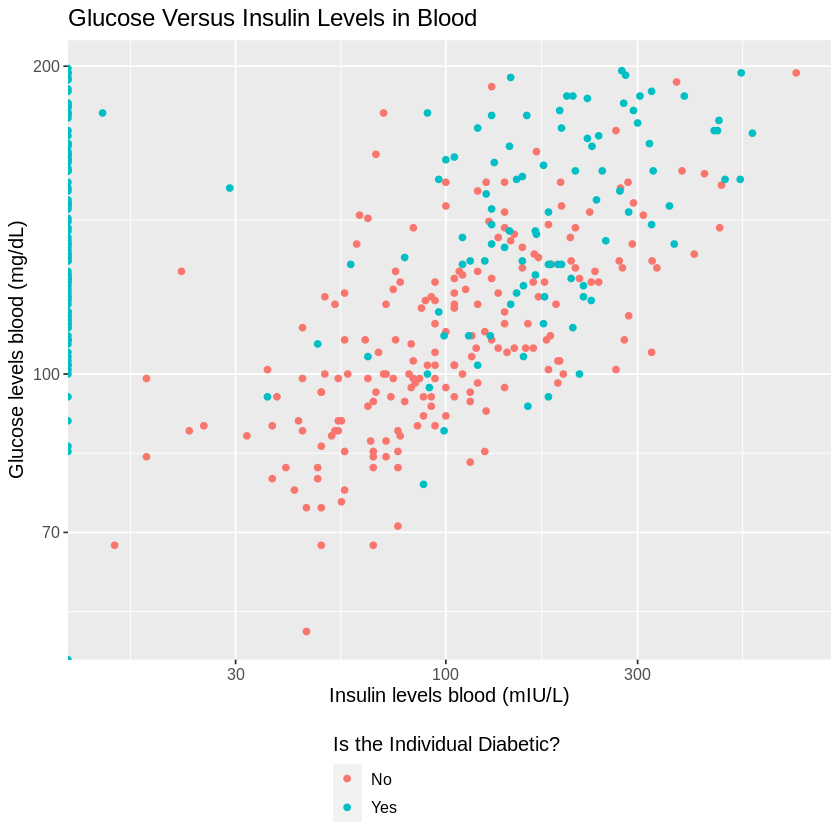

In [7]:
# Preliminary Exploratory Data Analysis: Visualize the training data

diabetes_train_plot <-ggplot (diabetes_train, aes(x = Insulin, 
                     y = Glucose, 
                     color = as_factor(Outcome))) +
geom_point(stat = "identity") +
    labs(x="Insulin levels blood (mIU/L)", y="Glucose levels blood (mg/dL)", color = "Is the Individual Diabetic?") + 
    theme(text = element_text(size = 12),
        legend.position = "bottom",
        legend.direction = "vertical") +
    scale_fill_discrete(name = "Diabetic?", labels = c("No", "Yes")) +
    scale_x_log10(labels = comma) +
    scale_y_log10(labels = comma) +
    ggtitle("Glucose Versus Insulin Levels in Blood") +
    scale_color_discrete(labels = c("No", "Yes"))

diabetes_train_plot



Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
6,accuracy,binary,0.7895738,5,0.006404982,Preprocessor1_Model04


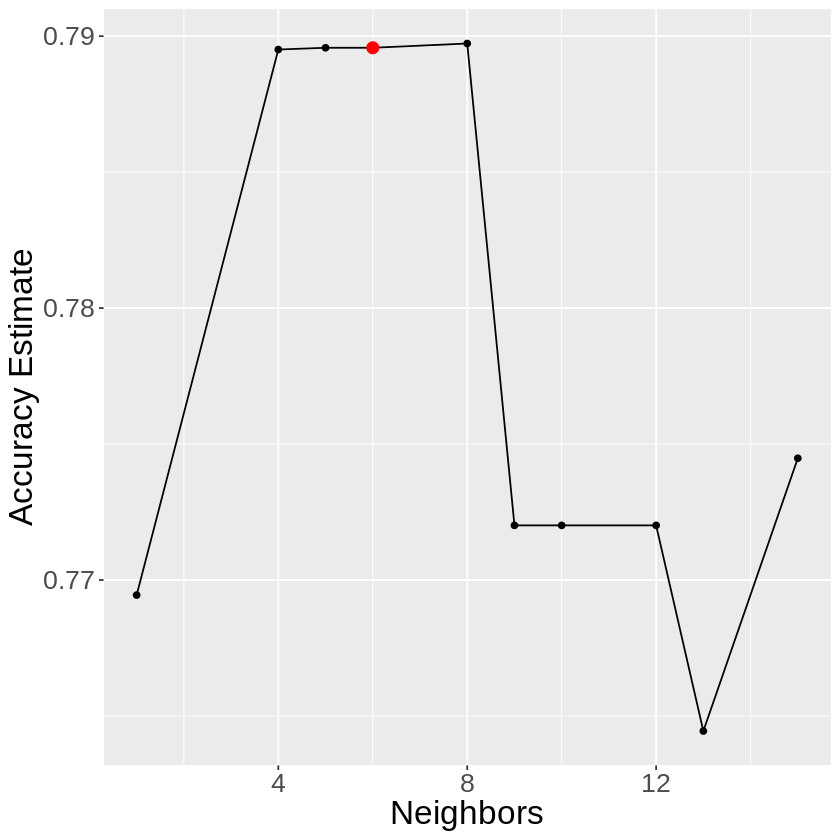

In [8]:
# Scale the data
set.seed(2020)

diabetes_vfold <- vfold_cv(diabetes_train, v = 5, strata = Outcome)

diabetes_recipe <- recipe(Outcome ~ Glucose + Insulin, data = diabetes_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())
diabetes_recipe

# Create classifier
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# Create the workflow for cross validation to find the optimal K value
knn_results <- workflow() |>
    add_recipe(diabetes_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = diabetes_vfold, grid = 10) |>
    collect_metrics() 

accuracies <- knn_results |>
    filter(.metric == "accuracy")

# Plot k values by accuracies to find the optimal K value
highlight_df <- accuracies |> 
             filter(neighbors == 6 )
highlight_df

# Create final classifier 
final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 6) |>
       set_engine("kknn") |>
       set_mode("classification")

# Create final workflow
final_fit <-workflow() |>
       add_recipe(diabetes_recipe) |>
       add_model(final_spec) |>
       fit(data=diabetes_train)


# Create predictions 
diabetes_predictions <- predict(final_fit, diabetes_test)|>
       bind_cols(diabetes_test) 

# Collect accuracy of predictions
diabetes_metrics<- diabetes_predictions |>
         metrics(truth = Outcome, estimate = .pred_class)  

# Create confidence matrix of predictions
diabetes_conf_mat <- diabetes_predictions |> 
       conf_mat(truth = Outcome, estimate = .pred_class)


cross_val_plot <- accuracies |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    geom_point(data=highlight_df, 
             aes(x=neighbors,y=mean), 
             color='red',
             size=3) +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 20)) 

cross_val_plot


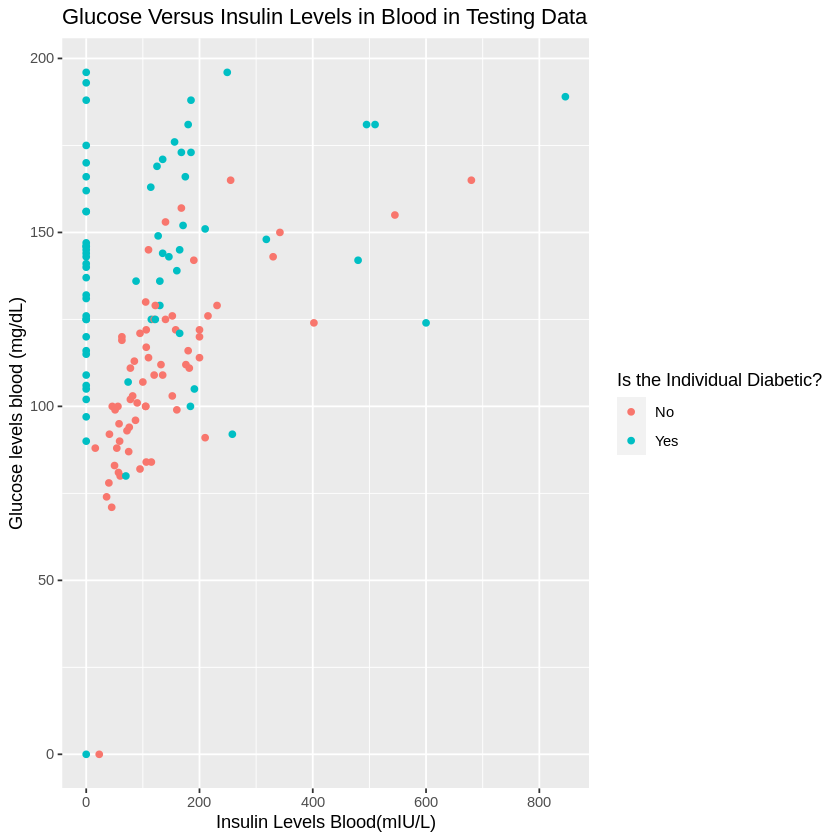

In [9]:
# Visualization of testing data
visualization_testing<- diabetes_predictions|> 
ggplot(aes(x=Insulin, y=Glucose, colour=Outcome))+
                                  geom_point()+
                                  labs(x="Insulin Levels Blood(mIU/L)", y="Glucose levels blood (mg/dL)", color = "Is the Individual Diabetic?")+
                                  ggtitle("Glucose Versus Insulin Levels in Blood in Testing Data")+
                                  scale_color_discrete(labels = c("No", "Yes"))
visualization_testing

In [10]:
#new observations analysis
new_obs<- tibble (Glucose= c(140,125), Insulin= c(0,150))
new_obs

obs_predicted <- predict(final_fit,new_obs)
obs_predicted

new_obs<-new_obs |>
    bind_cols(obs_predicted)
new_obs

#add new observation and its prediction into testing data manually for visualization

diabetes_all<- diabetes_predictions |>
    add_row(Glucose=140, Insulin=0, Outcome=as_factor(1)) |>
    add_row(Glucose=125, Insulin=150, Outcome=as_factor(1))
diabetes_all


Glucose,Insulin
<dbl>,<dbl>
140,0
125,150


.pred_class
<fct>
1
1


Glucose,Insulin,.pred_class
<dbl>,<dbl>,<fct>
140,0,1
125,150,1


.pred_class,Patient_number,Glucose,Insulin,Outcome
<fct>,<int>,<dbl>,<dbl>,<fct>
1,14,189,846,1
1,15,166,175,1
1,23,196,0,1
⋮,⋮,⋮,⋮,⋮
1,762,170,0,1
NA,NA,140,0,1
NA,NA,125,150,1


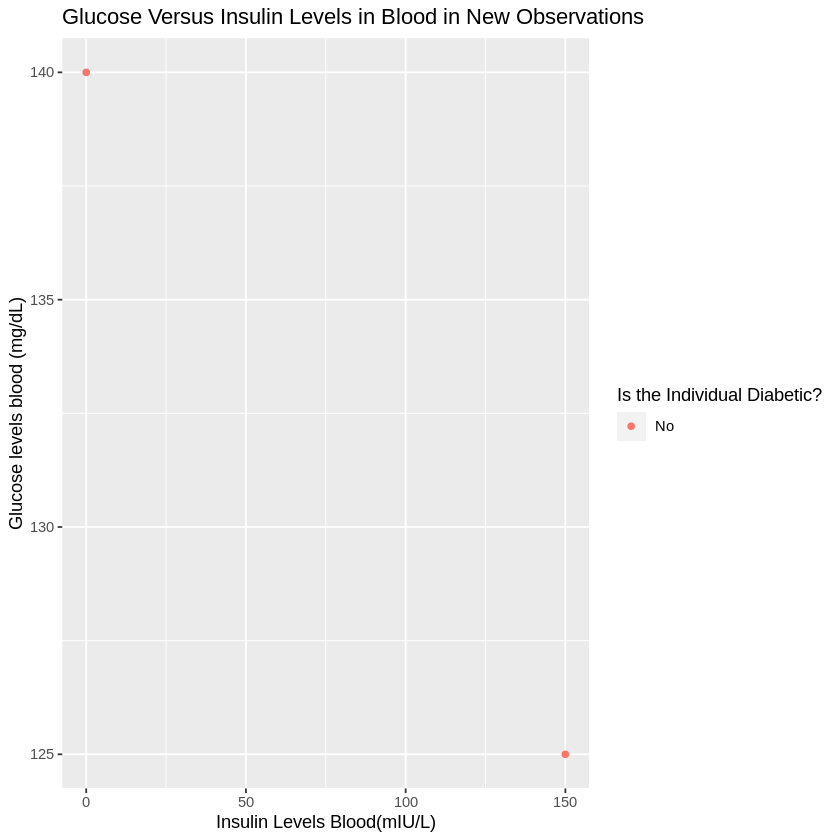

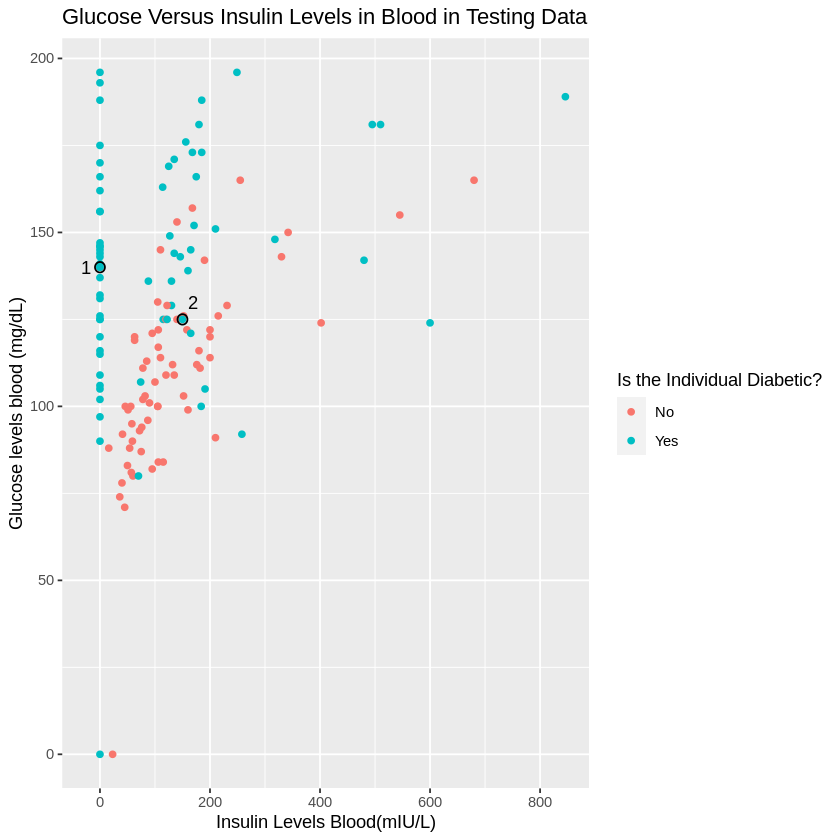

In [12]:
#Visualization of Outcomes
visualization_predictions<- new_obs|> 
ggplot(aes(x=Insulin, y=Glucose, colour=.pred_class))+
                                  geom_point()+
                                  labs(x="Insulin Levels Blood(mIU/L)", y="Glucose levels blood (mg/dL)", color = "Is the Individual Diabetic?")+
                                  ggtitle("Glucose Versus Insulin Levels in Blood in New Observations")+
                                  scale_color_discrete(labels = c("No", "Yes"))
visualization_predictions

# Visualization of testing data with new observations
point1<-c(0,140)
point2<-c(150,125)

visualization_testing<- diabetes_all|> 
ggplot(aes(x=Insulin, y=Glucose, colour=Outcome))+
                                  geom_point()+
                                  labs(x="Insulin Levels Blood(mIU/L)", y="Glucose levels blood (mg/dL)", color = "Is the Individual Diabetic?")+
                                  ggtitle("Glucose Versus Insulin Levels in Blood in Testing Data")+
                                  scale_color_discrete(labels = c("No", "Yes"))+
                                  annotate("path",
                                          x=point1[1]+9*cos(seq(0,2*pi,length.out=100)),
                                          y=point1[2]+1.5*sin(seq(0,2*pi,length.out=100))) +
                                  annotate("path",
                                          x=point2[1]+9*cos(seq(0,2*pi,length.out=100)),
                                          y=point2[2]+1.5*sin(seq(0,2*pi,length.out=100))) +
                                  annotate("text", x= -25,y=140, label="1") +
                                  annotate("text", x= 170,y=130, label="2")
visualization_testing

Discussion

In this data analysis, K-classification was performed with two possible response variables, diabetic and non-diabetic, and the two predictor variables, glucose and insulin. We found by comparing glucose and insulin values to patients with a known diagnosis that there is a correlation between both the glucose levels in the blood, and insulin levels in the blood. Namely, non-diabetic individuals, as glucose levels increase, insulin levels increase in the blood as well. In contrast, diabetic patients show little insulin in the blood as glucose increases. A significant portion of the data points do show no correlation between the glucose and insulin levels in the blood. However, there is a considerable portion that also seems to form a weak positive relationship between the glucose and insulin levels in the blood, which was unexpected. These findings may represent two different types of diabetes, type 1 which has no insulin production and type 2 which may have limited to normal insulin production. 

We correctly identified that there should be two response variables–diabetic and non-diabetic. Also, we predicted that there would be a positive relationship between glucose and insulin levels in non-diabetic individuals and no relationship for diabetic individuals. However, we did not predict that there would be a small population of non-diabetic individuals that show a weak positive relationship. This may be due to type 2 diabetic individuals being a part of the initial data set that bypassed our initial selection of only type 1 diabetic individuals. 

It is important to note that diabetes is dependent on numerous variables and that by classifying new individuals against this dataset, it may indicate a possibility of diabetes, not a confirmation of diabetes. Further testing would be required. However, this data analysis could be largely relevant in medicine, since it allows predictions to be made with limited testing. Nonetheless, this is not a medical device that can give concrete proof of diabetes, but it can be a good starting point if only limited information is available.  When used in the field of  research, this can be a powerful tool in visualizing correlations and outcomes. 

The future applications of this analysis include incorporating more data on the individuals in order to not only predict if the individual has diabetes, but also the type of diabetes. Additionally, in subsequent research we can use different columns of the data set to see the impact of those variables on the correlation value and whether they can help predict with more accuracy.



*References/ Links*

Mean Fasting Blood Glucose, World Health Organization, Mean fasting blood glucose - World Health Organization (WHO)https://www.who.int › ... › Indicator Metadata Registry List

Total and Free Insulin (Blood), University of Rochester Medical Center Rochester,https://www.urmc.rochester.edu/encyclopedia/content.aspx?contenttypeid=167&contentid=insulin_total_free

Diabetes Tests, CDC, Diabetes Tests | CDChttps://www.cdc.gov › diabetes › basics › getting-tested

Do You Know Your Insulin Level?, Diabetes Self-Management, https://www.diabetesselfmanagement.com/blog/do-you-know-your-insulin-level/

